In [1]:
import pandas as pd

In [30]:
dfs = pd.read_excel('env_air_emis__custom_16946228_spreadsheet.xlsx', sheet_name=None) # Passing sheet_name=None returs a dict of all sheets

In [31]:
dfs.keys()

dict_keys(['Data', 'org', 'pm10', 'pm25', 'nh3', 'sox', 'nox'])

In [57]:
def clean_data(df):
    df = df[2:]
    df.dropna(axis=1, how='all', inplace=True)
    index_name = 'NAME'
    df.rename(columns={'TIME': index_name}, inplace=True)
    df.set_index(index_name, inplace=True)
    return df

In [44]:
import geopandas as gpd

In [55]:
europe = gpd.read_file('https://raw.githubusercontent.com/leakyMirror/map-of-europe/27a335110674ae5b01a84d3501b227e661beea2b/GeoJSON/europe.geojson')

C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='all', inplace=True)
C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME': index_name}, inplace=True)


(-25.0, 45.0, 30.0, 72.0)

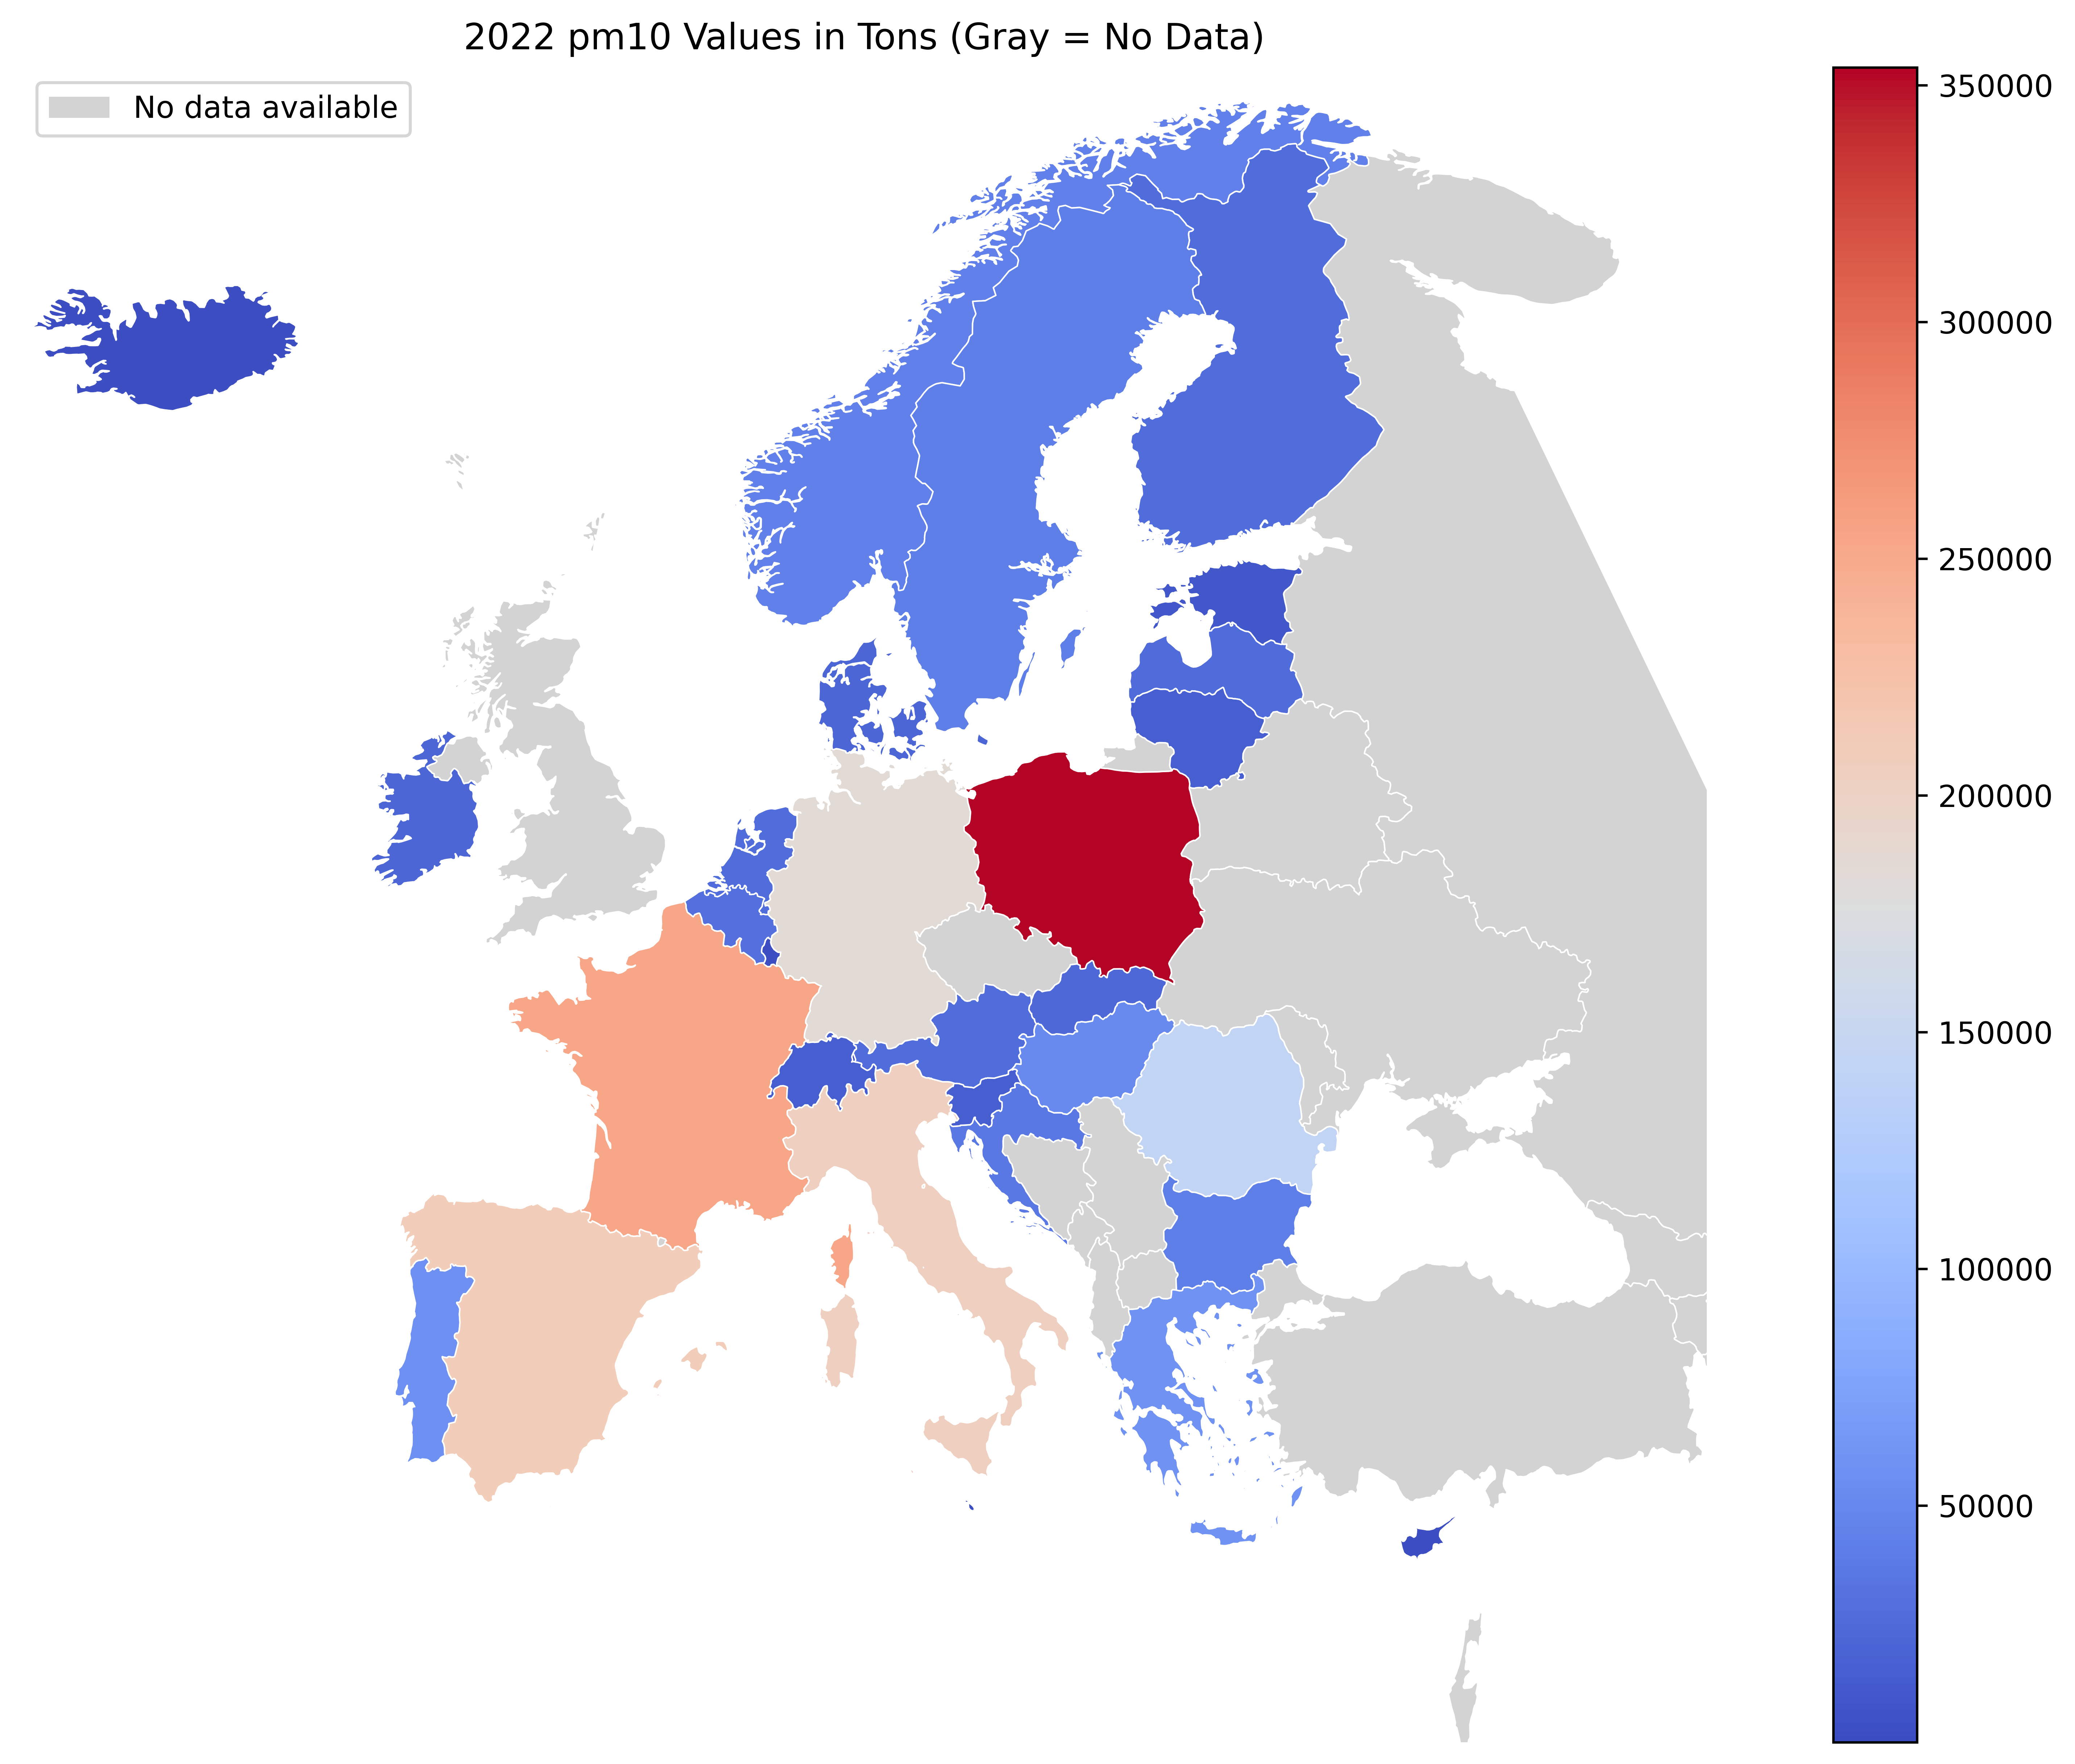

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

year = '2022'
pol = 'pm10'

pol_data = clean_data(dfs[pol])

gdf = europe.join(pol_data, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='coolwarm', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} Values in Tons (Gray = No Data)')
ax.axis('off')

In [69]:
gdp = pd.read_excel('gdp_yearly.xlsx', sheet_name='clean')

gdp.head()

Country   2014   2015   2016   2017   2018   2019   2020   2021   2022  \
0   Belgium  36000  37000  38000  39100  40300  41700  40200  43700  48200   
1  Bulgaria   6100   6600   7100   7700   8400   9300   9500  11000  13300   
2   Czechia  15100  16200  17000  18700  20300  21700  21000  23400  26700   
3   Denmark  47100  47900  49300  51100  52000  53000  53500  59000  64700   
4   Germany  36100  37000  38100  39500  40600  42500  41500  44200  47200   

    2023  
0  50600  
1  14700  
2  29200  
3  63300  
4  49500

In [70]:
import numpy as np
def fill_semicolons(x):
    if x == ':':
        return np.nan
    return x

In [79]:
gdp_short = gdp.rename(columns={'Country': 'NAME'}).set_index('NAME').melt(ignore_index=False, value_name='GDP', var_name='Year')

In [86]:
pm10_short = pm10.melt(ignore_index=False, var_name='Year', value_name='pm10')

In [87]:
gdp_short['GDP'] = gdp_short['GDP'].map(fill_semicolons)

In [113]:
gdp_short['Year'] = gdp_short['Year'].map(str)

In [114]:
gdp_short[gdp_short['Year'] == '2022']

Year       GDP
NAME                           
Belgium          2022   48200.0
Bulgaria         2022   13300.0
Czechia          2022   26700.0
Denmark          2022   64700.0
Germany          2022   47200.0
Estonia          2022   27400.0
Ireland          2022  100200.0
Greece           2022   19600.0
Spain            2022   28700.0
France           2022   39000.0
Croatia          2022   17300.0
Italy            2022   33800.0
Cyprus           2022   32200.0
Latvia           2022   19100.0
Lithuania        2022   23800.0
Luxembourg       2022  118300.0
Hungary          2022   17600.0
Malta            2022   34300.0
Netherlands      2022   56100.0
Austria          2022   49500.0
Poland           2022   17500.0
Portugal         2022   23300.0
Romania          2022   14800.0
Slovenia         2022   27000.0
Slovakia         2022   20200.0
Finland          2022   47900.0
Sweden           2022   52400.0
Norway           2022       NaN
Switzerland      2022       NaN
Montenegro       2022    9600.0
North Macedonia  2022    7200.0
Albania          2022       NaN
Serbia           2022    9500.0
Türkiye          2022   10100.0

In [115]:
pm10_short[pm10_short['Year'] == '2022']

Year      pm10
NAME                         
Belgium        2022   29353.0
Bulgaria       2022   42448.0
Czechia        2022   69473.0
Denmark        2022   21428.0
Germany        2022  184558.0
Estonia        2022    9015.0
Ireland        2022   21030.0
Greece         2022   59032.0
Spain          2022  209441.0
France         2022  253063.0
Croatia        2022   36156.0
Italy          2022  205689.0
Cyprus         2022    1998.0
Latvia         2022   26277.0
Lithuania      2022   14147.0
Luxembourg     2022    1689.0
Hungary        2022   51443.0
Malta          2022    1833.0
Netherlands    2022   26880.0
Austria        2022   27369.0
Poland         2022  353748.0
Portugal       2022   57922.0
Romania        2022  143134.0
Slovenia       2022   13900.0
Slovakia       2022   23322.0
Finland        2022   26778.0
Sweden         2022   42680.0
Iceland        2022    2168.0
Liechtenstein  2022      35.0
Norway         2022   43928.0
Switzerland    2022   14257.0
Türkiye        2022  289019.0

Trying a linear fit

C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='all', inplace=True)
C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME': index_name}, inplace=True)


<Axes: xlabel='GDP', ylabel='pm10'>

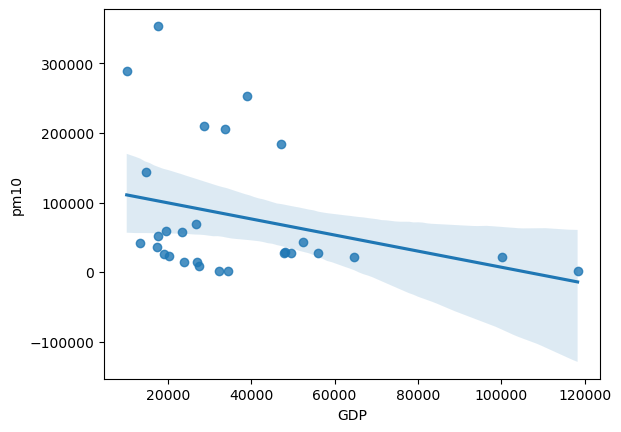

In [162]:
import seaborn as sns

year = '2022'

pol = 'pm10'

pol_data = clean_data(dfs[pol])
pol_short = pol_data.melt(ignore_index=False, var_name="Year", value_name=pol)

df_comp = pol_short[pol_short['Year'] == year].drop(columns='Year').merge(gdp_short[gdp_short['Year'] == year].drop(columns='Year'), how='outer', on='NAME')

sns.regplot(df_comp, x='GDP', y=pol, fit_reg=True, truncate=True)


Will a 2nd order fit look better?

C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='all', inplace=True)
C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME': index_name}, inplace=True)


<Axes: xlabel='GDP', ylabel='pm10'>

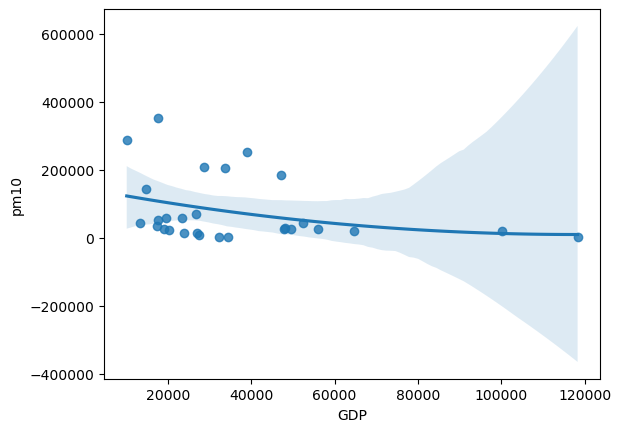

In [159]:
year = '2022'

pol = 'pm10'

pol_data = clean_data(dfs[pol])
pol_short = pol_data.melt(ignore_index=False, var_name="Year", value_name=pol)

df_comp = pol_short[pol_short['Year'] == year].drop(columns='Year').merge(gdp_short[gdp_short['Year'] == year].drop(columns='Year'), how='outer', on='NAME')

sns.regplot(df_comp, x='GDP', y=pol, fit_reg=True, order=2)

What about logx

C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='all', inplace=True)
C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME': index_name}, inplace=True)


<Axes: xlabel='GDP', ylabel='pm10'>

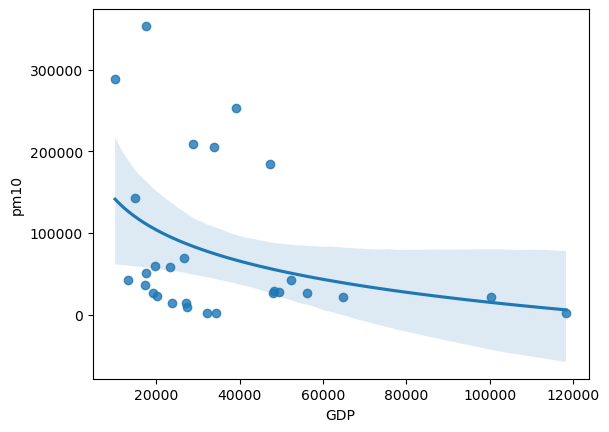

In [160]:
year = '2022'

pol = 'pm10'

pol_data = clean_data(dfs[pol])
pol_short = pol_data.melt(ignore_index=False, var_name="Year", value_name=pol)

df_comp = pol_short[pol_short['Year'] == year].drop(columns='Year').merge(gdp_short[gdp_short['Year'] == year].drop(columns='Year'), how='outer', on='NAME')

sns.regplot(df_comp, x='GDP', y=pol, logx=True)

In [181]:
gdp_mio = pd.read_excel('gdp_mio.xlsx', sheet_name='clean')

gdp_mio.head()

TIME        2014        2015        2016        2017        2018  \
0   Belgium   403003.30   416701.40   430085.30   445050.10   460050.80   
1  Bulgaria    43024.69    45797.83    48752.14    52501.77    56131.33   
2   Czechia   158991.54   170527.26   179145.89   196738.74   213505.40   
3   Denmark   265635.73   272193.00   282265.12   294355.04   301017.31   
4   Germany  2927430.00  3026180.00  3134740.00  3267160.00  3365450.00   

         2019        2020        2021       2022       2023  
0   478676.20   463750.90   506023.20   563543.6   596320.6  
1    61308.16    61912.47    71378.45   86082.44   94709.33  
2   229406.66   220310.64   246012.29   286976.8  317385.77  
3   308546.19   312118.31   345235.98  382309.26     376430  
4  3534880.00  3449620.00  3676460.00    3953850    4185550

In [183]:
gdp_mio_short = gdp_mio.rename(columns={'TIME': 'NAME'}).set_index('NAME').melt(ignore_index=False, value_name='GDP', var_name='Year')

In [190]:
gdp_mio_short['GDP'] = gdp_mio_short['GDP'].map(fill_semicolons)

C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='all', inplace=True)
C:\Users\schat\AppData\Local\Temp\ipykernel_11956\4159341802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME': index_name}, inplace=True)


<Axes: xlabel='GDP', ylabel='pm10'>

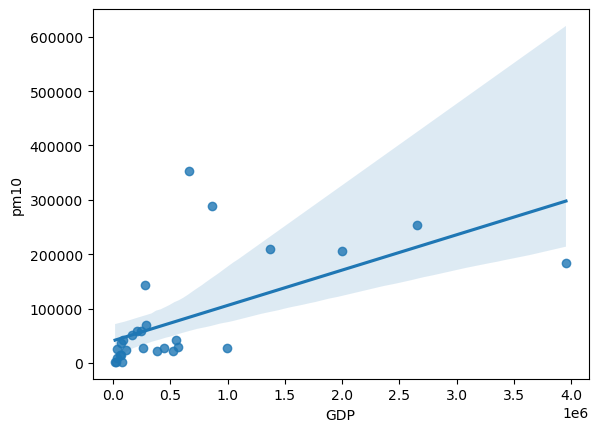

In [191]:
year = '2022'

pol = 'pm10'

pol_data = clean_data(dfs[pol])
pol_short = pol_data.melt(ignore_index=False, var_name="Year", value_name=pol)

df_comp = pol_short[pol_short['Year'] == year].drop(columns='Year').merge(gdp_mio_short[gdp_mio_short['Year'] == year].drop(columns='Year'), how='outer', on='NAME')

sns.regplot(df_comp, x='GDP', y=pol, fit_reg=True, truncate=True)

In [256]:
pop_df = pd.read_excel('pop.xlsx', sheet_name='clean')

In [257]:
pop_df.drop(0, inplace=True)

In [258]:
pop_df

TIME        2015        2016        2017        2018  \
1           Belgium  11237274.0  11311117.0  11351727.0  11398589.0   
2          Bulgaria   7029690.0   6938759.0   6849518.0   6757418.0   
3           Czechia  10538275.0  10553843.0  10578820.0  10610055.0   
4           Denmark   5659715.0   5707251.0   5748769.0   5781190.0   
5           Germany  81197537.0  82175684.0  82521653.0  82792351.0   
6           Estonia   1314870.0   1315944.0   1315635.0   1319133.0   
7           Ireland   4677627.0   4726286.0   4799157.0   4855733.0   
8            Greece  10858018.0  10783748.0  10768193.0  10741165.0   
9             Spain  46425722.0  46418884.0  46497393.0  46645070.0   
10           France  66458153.0  66638391.0  66809816.0  67026224.0   
11          Croatia   4180915.0   4131115.0   4078769.0   4014341.0   
12            Italy  60295497.0  60163712.0  60066734.0  59937769.0   
13           Cyprus    860846.0    863764.0    869878.0    878601.0   
14           Latvia   1986096.0   1968957.0   1950116.0   1934379.0   
15        Lithuania   2926644.0   2895573.0   2859077.0   2826200.0   
16       Luxembourg    562958.0    576249.0    590667.0    602005.0   
17          Hungary   9815858.0   9779652.0   9739857.0   9713655.0   
18            Malta    438805.0    449635.0    459375.0    474837.0   
19      Netherlands  16900726.0  16979120.0  17081507.0  17181084.0   
20          Austria   8584926.0   8700471.0   8772865.0   8822267.0   
21           Poland  38005614.0  37967209.0  37972964.0  37976687.0   
22         Portugal  10395121.0  10368554.0  10344478.0  10335770.0   
23          Romania  19870647.0  19760585.0  19643949.0  19533481.0   
24         Slovenia   2062874.0   2064188.0   2065895.0   2066880.0   
25         Slovakia   5421349.0   5426252.0   5435343.0   5443120.0   
26          Finland   5471753.0   5487308.0   5503297.0   5513130.0   
27           Sweden   9747355.0   9851017.0   9995153.0  10120242.0   
28          Iceland    329100.0    332529.0    338349.0    348450.0   
29    Liechtenstein     37366.0     37622.0     37810.0     38114.0   
30           Norway   5165802.0   5213985.0   5258317.0   5295619.0   
31      Switzerland   8237666.0   8327126.0   8419550.0   8484130.0   
32   United Kingdom  64853393.0  65379044.0  65844142.0  66273576.0   
33       Montenegro    622099.0    622218.0    622387.0    622359.0   
34  North Macedonia   2069172.0   2071278.0   2073702.0   2075301.0   
35          Albania   2885796.0   2875592.0   2876591.0   2870324.0   
36           Serbia   7114393.0   7076372.0   7040272.0   7001444.0   
37          Türkiye  77695904.0  78741053.0  79814871.0  80810525.0   

          2019      2020      2021      2022      2023      2024  
1   11455519.0  11522440  11554767  11617623  11742796  11817096  
2    6664177.0   6569275   6532117   6482484   6447710   6445481  
3   10649800.0  10693939  10494836  10516707  10827529  10900555  
4    5806081.0   5822763   5840045   5873420   5932654   5961249  
5   83019213.0  83166711  83155031  83237124  83118501  83456045  
6    1324820.0   1328976   1330068   1331796   1365884   1374687  
7    4940311.0   5012600   5066893   5154277   5271395   5351681  
8   10724599.0  10718565  10678632  10459782  10413982  10400720  
9   46918951.0  47318050  47400798  47486843  48085361  48619695  
10  67290471.0  67473651  67728568  68091703  68277210  68467362  
11   3968676.0   3933511   3893026   3862305   3850894   3861967  
12  59816673.0  59641488  59236213  59030133  58997201  58971230  
13    890194.0    902429    914476    929764    949084    966365  
14   1919968.0   1907675   1893223   1875757   1883008   1871882  
15   2812200.0   2809977   2810761   2805998   2857279   2885891  
16    613894.0    626108    634730    645397    660809    672050  
17   9700272.0   9689376   9651461   9610403   9599744   9584627  
18    492968.0    514855    516125    520174    542051    563443  
19  17282163.0  17407585  17475415  1759067

In [259]:
pop_df.drop(32, inplace=True)

In [250]:
list(map(str, range(2015, 2023)))

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [273]:
pop_df.set_index('TIME', inplace=True)

In [274]:
pop_df[list(map(str, range(2015, 2023)))]

2015        2016        2017        2018        2019  \
TIME                                                                          
Belgium          11237274.0  11311117.0  11351727.0  11398589.0  11455519.0   
Bulgaria          7029690.0   6938759.0   6849518.0   6757418.0   6664177.0   
Czechia          10538275.0  10553843.0  10578820.0  10610055.0  10649800.0   
Denmark           5659715.0   5707251.0   5748769.0   5781190.0   5806081.0   
Germany          81197537.0  82175684.0  82521653.0  82792351.0  83019213.0   
Estonia           1314870.0   1315944.0   1315635.0   1319133.0   1324820.0   
Ireland           4677627.0   4726286.0   4799157.0   4855733.0   4940311.0   
Greece           10858018.0  10783748.0  10768193.0  10741165.0  10724599.0   
Spain            46425722.0  46418884.0  46497393.0  46645070.0  46918951.0   
France           66458153.0  66638391.0  66809816.0  67026224.0  67290471.0   
Croatia           4180915.0   4131115.0   4078769.0   4014341.0   3968676.0   
Italy            60295497.0  60163712.0  60066734.0  59937769.0  59816673.0   
Cyprus             860846.0    863764.0    869878.0    878601.0    890194.0   
Latvia            1986096.0   1968957.0   1950116.0   1934379.0   1919968.0   
Lithuania         2926644.0   2895573.0   2859077.0   2826200.0   2812200.0   
Luxembourg         562958.0    576249.0    590667.0    602005.0    613894.0   
Hungary           9815858.0   9779652.0   9739857.0   9713655.0   9700272.0   
Malta              438805.0    449635.0    459375.0    474837.0    492968.0   
Netherlands      16900726.0  16979120.0  17081507.0  17181084.0  17282163.0   
Austria           8584926.0   8700471.0   8772865.0   8822267.0   8858775.0   
Poland           38005614.0  37967209.0  37972964.0  37976687.0  37972812.0   
Portugal         10395121.0  10368554.0  10344478.0  10335770.0  10333496.0   
Romania          19870647.0  19760585.0  19643949.0  19533481.0  19414458.0   
Slovenia          2062874.0   2064188.0   2065895.0   2066880.0   2080908.0   
Slovakia          5421349.0   5426252.0   5435343.0   5443120.0   5450421.0   
Finland           5471753.0   5487308.0   5503297.0   5513130.0   5517919.0   
Sweden            9747355.0   9851017.0   9995153.0  10120242.0  10230185.0   
Iceland            329100.0    332529.0    338349.0    348450.0    356991.0   
Liechtenstein       37366.0     37622.0     37810.0     38114.0     38378.0   
Norway            5165802.0   5213985.0   5258317.0   5295619.0   5328212.0   
Switzerland       8237666.0   8327126.0   8419550.0   8484130.0   8544527.0   
Montenegro         622099.0    622218.0    622387.0    622359.0    622182.0   
North Macedonia   2069172.0   2071278.0   2073702.0   2075301.0   2077132.0   
Albania           2885796.0   2875592.0   2876591.0   2870324.0   2862427.0   
Serbia            7114393.0   7076372.0   7040272.0   7001444.0   6963764.0   
Türkiye          77695904.0  78741053.0  79814871.0  80810525.0  82003882.0   

                     2020      2021      2022  
TIME                                           
Belgium          11522440  11554767  11617623  
Bulgaria          6569275   6532117   6482484  
Czechia          10693939  10494836  10516707  
Denmark           5822763   5840045   5873420  
Germany          83166711  83155031  83237124  
Estonia           1328976   1330068   1331796  
Ireland           5012600   5066893   5154277  
Greece           10718565  10678632  10459782  
Spain            47318050  47400798  47486843  
France           67473651  67728568  68091703  
Croatia           3933511   3893026   3862305  
Italy            59641488  59236213  59030133  
Cyprus             902429    914476    929764  
Latvia            1907675   1893223   1875757  
Lithuania         2809977   2810761   2805998  
Luxembourg         626108    634730    645397  
Hungary           9689376   9651461   9610403  
Malta              514855    516125    520174  
Netherlands      17407585  17475415  17590672  
Austria     

In [275]:
pm10[list(map(str, range(2015, 2023)))]

2015      2016      2017      2018      2019      2020  \
NAME                                                                        
Belgium         33638.0   33983.0   32293.0   31726.0   28861.0   29059.0   
Bulgaria        52461.0   46419.0   46233.0   46447.0   46152.0   46802.0   
Czechia         96764.0   93180.0   91250.0   85831.0   79078.0   74129.0   
Denmark         27450.0   27226.0   26895.0   25965.0   23420.0   22426.0   
Germany        212424.0  197597.0  200196.0  206371.0  192684.0  179911.0   
Estonia         13782.0   12107.0   12520.0   12116.0   10191.0   10440.0   
Ireland         23442.0   23620.0   23388.0   23158.0   22802.0   22347.0   
Greece          67456.0   67167.0   64681.0   58467.0   58166.0   56494.0   
Spain          238024.0  214836.0  212522.0  229345.0  210767.0  208605.0   
France         314695.0  320235.0  310806.0  296774.0  292292.0  256339.0   
Croatia         42346.0   42987.0   38358.0   41084.0   38560.0   44071.0   
Italy          230929.0  216384.0  226340.0  228759.0  206151.0  199552.0   
Cyprus           1683.0    1839.0    1900.0    1961.0    2085.0    1915.0   
Latvia          26410.0   25215.0   26342.0   26813.0   26494.0   25307.0   
Lithuania       15690.0   17416.0   14515.0   20190.0   13918.0   13578.0   
Luxembourg       2110.0    2060.0    1980.0    1990.0    1760.0    1547.0   
Hungary         72384.0   69809.0   65419.0   60457.0   57966.0   53647.0   
Malta            1089.0    1321.0    1196.0    1347.0    1469.0    1650.0   
Netherlands     31826.0   31289.0   30548.0   29932.0   28846.0   26930.0   
Austria         30792.0   30502.0   30735.0   29542.0   29429.0   27451.0   
Poland         401382.0  413035.0  408180.0  482520.0  428524.0  403891.0   
Portugal        57540.0   58096.0   57736.0   58067.0   58630.0   57090.0   
Romania        145115.0  142924.0  142528.0  140808.0  146437.0  145109.0   
Slovenia        14533.0   15425.0   14809.0   13350.0   13284.0   13365.0   
Slovakia        28800.0   27194.0   27537.0   23169.0   23642.0   23552.0   
Finland         31113.0   32035.0   30614.0   30735.0   29644.0   26615.0   
Sweden          45159.0   45943.0   46695.0   45727.0   44676.0   43209.0   
Iceland          2322.0    2612.0    2476.0    2340.0    2335.0    2110.0   
Liechtenstein      42.0      40.0      39.0      40.0      37.0      34.0   
Norway          46799.0   44140.0   44236.0   44488.0   42882.0   42641.0   
Switzerland     15894.0   15866.0   15673.0   15299.0   15076.0   14344.0   
Türkiye        351808.0  344388.0  339683.0  255603.0  289591.0  315004.0   

                   2021      2022  
NAME                               
Belgium         31226.0   29353.0  
Bulgaria        46536.0   42448.0  
Czechia         74104.0   69473.0  
Denmark         22441.0   21428.0  
Germany        182509.0  184558.0  
Estonia         10176.0    9015.0  
Ireland         22419.0   21030.0  
Greece          56769.0   59032.0  
Spain          211208.0  209441.0  
France         278535.0  253063.0  
Croatia         43545.0   36156.0  
Italy          212210.0  205689.0  
Cyprus           2063.0    1998.0  
Latvia          27667.0   26277.0  
Lithuania       13907.0   14147.0  
Luxembourg       1621.0    1689.0  
Hungary         53394.0   51443.0  
Malta            1358.0    1833.0  
Netherlands     26976.0   26880.0  
Austria         29363.0   27369.0  
Poland         397512.0  353748.0  
Portugal        58681.0   57922.0  
Romania        152318.0  143134.0  
Slovenia        15467.0   13900.0  
Slovakia        25593.0   23322.0  
Finland         27344.0   26778.0  
Sweden          42914.0   42680.0  
Iceland          2268.0    2168.0  
Liechtenstein      34.0      35.0  
Norway          43068.0   43928.0  
Switzerland     14731.0   14257.0  
Türkiye        305583.0  289019.0

In [276]:
pm10_per_cap = pm10[list(map(str, range(2015, 2023)))] / pop_df[list(map(str, range(2015, 2023)))]

In [277]:
pm10_per_cap

2015      2016      2017      2018      2019      2020  \
Albania               NaN       NaN       NaN       NaN       NaN       NaN   
Austria          0.003587  0.003506  0.003503  0.003349  0.003322  0.003084   
Belgium          0.002993  0.003004  0.002845  0.002783  0.002519  0.002522   
Bulgaria         0.007463  0.006690  0.006750  0.006873  0.006925  0.007124   
Croatia          0.010128  0.010406  0.009404  0.010234  0.009716  0.011204   
Cyprus           0.001955  0.002129  0.002184  0.002232  0.002342  0.002122   
Czechia          0.009182  0.008829  0.008626  0.008090  0.007425  0.006932   
Denmark          0.004850  0.004770  0.004678  0.004491  0.004034  0.003851   
Estonia          0.010482  0.009200  0.009516  0.009185  0.007692  0.007856   
Finland          0.005686  0.005838  0.005563  0.005575  0.005372  0.004817   
France           0.004735  0.004806  0.004652  0.004428  0.004344  0.003799   
Germany          0.002616  0.002405  0.002426  0.002493  0.002321  0.002163   
Greece           0.006213  0.006229  0.006007  0.005443  0.005424  0.005271   
Hungary          0.007374  0.007138  0.006717  0.006224  0.005976  0.005537   
Iceland          0.007056  0.007855  0.007318  0.006715  0.006541  0.005795   
Ireland          0.005012  0.004998  0.004873  0.004769  0.004615  0.004458   
Italy            0.003830  0.003597  0.003768  0.003817  0.003446  0.003346   
Latvia           0.013297  0.012806  0.013508  0.013861  0.013799  0.013266   
Liechtenstein    0.001124  0.001063  0.001031  0.001049  0.000964  0.000877   
Lithuania        0.005361  0.006015  0.005077  0.007144  0.004949  0.004832   
Luxembourg       0.003748  0.003575  0.003352  0.003306  0.002867  0.002471   
Malta            0.002482  0.002938  0.002604  0.002837  0.002980  0.003205   
Montenegro            NaN       NaN       NaN       NaN       NaN       NaN   
Netherlands      0.001883  0.001843  0.001788  0.001742  0.001669  0.001547   
North Macedonia       NaN       NaN       NaN       NaN       NaN       NaN   
Norway           0.009059  0.008466  0.008413  0.008401  0.008048  0.007944   
Poland           0.010561  0.010879  0.010749  0.012706  0.011285   0.01064   
Portugal         0.005535  0.005603  0.005581  0.005618  0.005674  0.005502   
Romania          0.007303  0.007233  0.007256  0.007209  0.007543  0.007507   
Serbia                NaN       NaN       NaN       NaN       NaN       NaN   
Slovakia         0.005312  0.005012  0.005066  0.004257  0.004338  0.004315   
Slovenia         0.007045  0.007473  0.007168  0.006459  0.006384  0.006377   
Spain            0.005127  0.004628  0.004571  0.004917  0.004492  0.004409   
Sweden           0.004633  0.004664  0.004672  0.004518  0.004367  0.004184   
Switzerland      0.001929  0.001905  0.001862  0.001803  0.001764  0.001667   
Türkiye          0.004528  0.004374  0.004256  0.003163  0.003531  0.003788   

                     2021      2022  
Albania               NaN       NaN  
Austria          0.003287  0.003048  
Belgium          0.002702  0.002527  
Bulgaria         0.007124  0.006548  
Croatia          0.011185  0.009361  
Cyprus           0.002256  0.002149  
Czechia          0.007061  0.006606  
Denmark          0.003843  0.003648  
Estonia          0.007651  0.006769  
Finland          0.004941  0.004826  
France           0.004113  0.003717  
Germany          0.002195  0.002217  
Greece           0.005316  0.005644  
Hungary          0.005532  0.005353  
Iceland           0.00615  0.005762  
Ireland          0.004425   0.00408  
Italy            0.003582  0.003484  
Latvia           0.014614  0.014009  
Liechtenstein    0.000871   0.00089  
Lithuania        0.004948  0.005042  
Luxembourg       0.002554  0.002617  
Malta            0.002631  0.003524  
Montenegro            NaN       NaN  
Netherlands      0.001544  0.001528  
North Macedonia       NaN       NaN  
Norway           0.007988  0.008097  
Poland           0.010722  0.009589  
Portugal         0.005645  0.0055

C:\Users\schat\anaconda3\lib\site-packages\geopandas\plotting.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


Text(0.5, 1.0, '2022 pm10 Values in Tons Per Capita (Gray = No Data)')

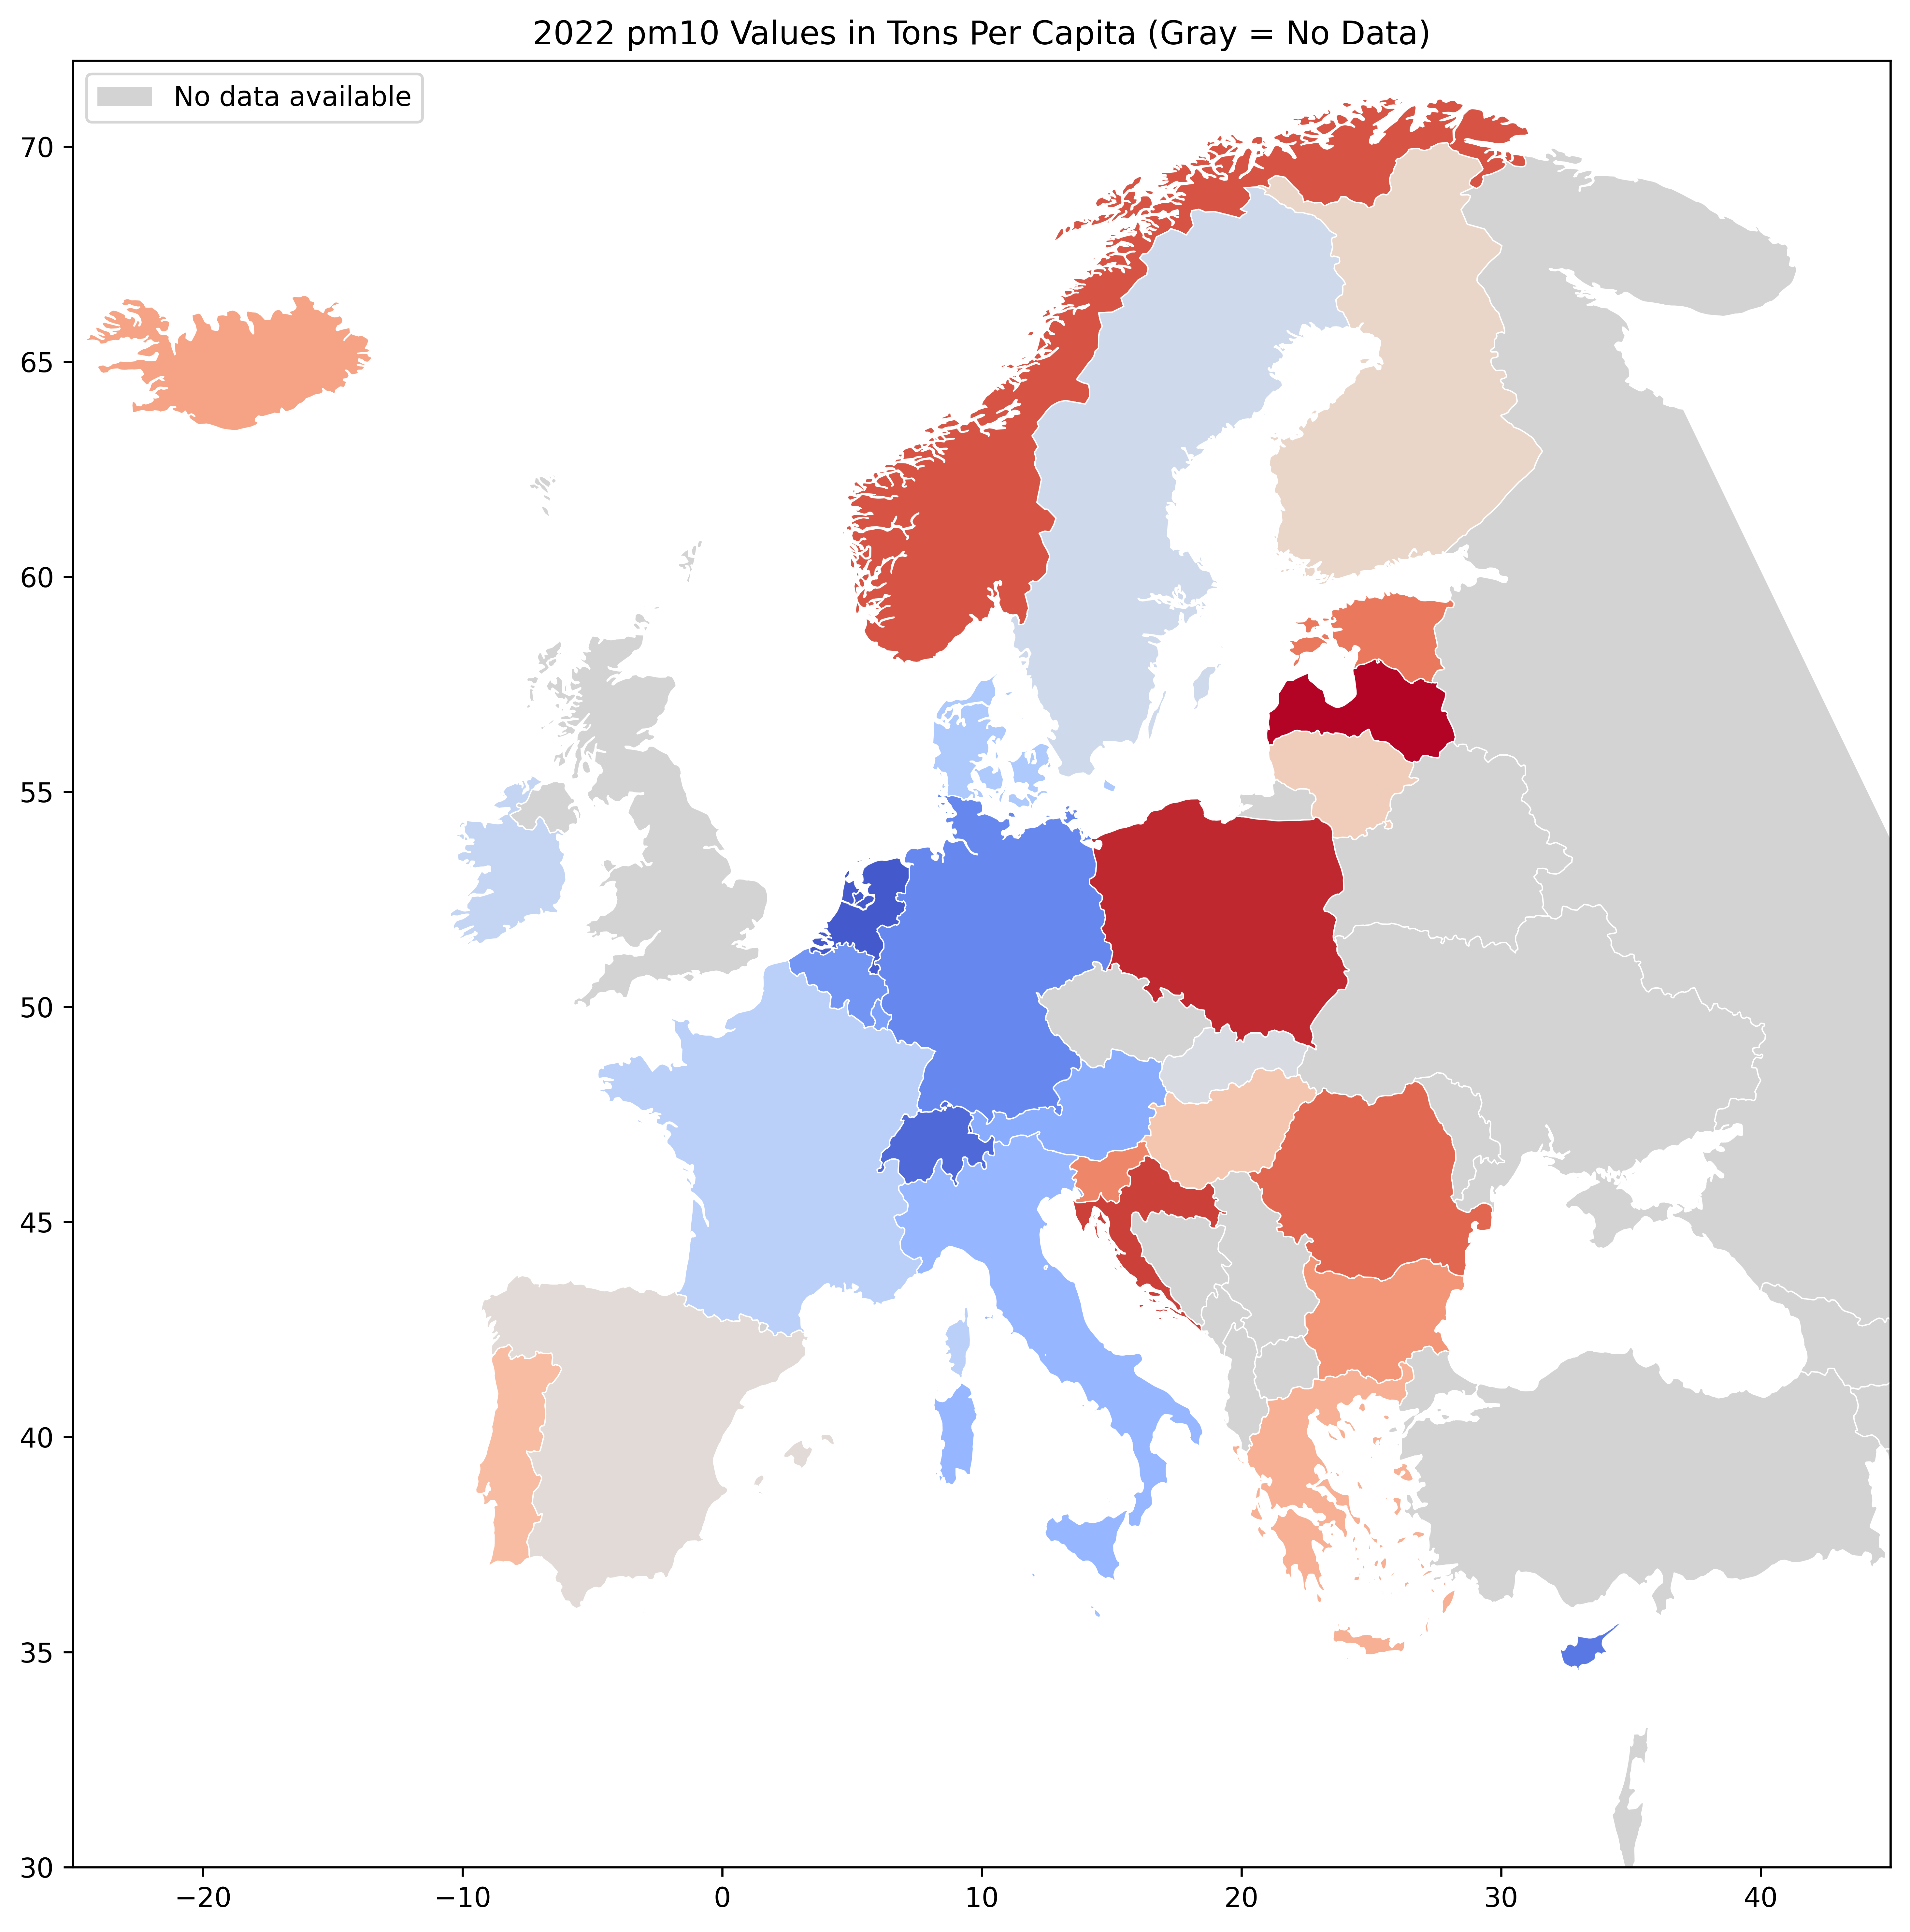

In [283]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=600)

year = '2022'

gdf = europe.join(pm10_per_cap, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='coolwarm', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} Values in Tons Per Capita (Gray = No Data)')
#ax.axis('off')

In [288]:
gdp.columns = gdp.columns.map(str)

In [295]:
gdp

NAME   2014   2015   2016   2017   2018    2019    2020  \
0           Belgium  36000  37000  38000  39100  40300   41700   40200   
1          Bulgaria   6100   6600   7100   7700   8400    9300    9500   
2           Czechia  15100  16200  17000  18700  20300   21700   21000   
3           Denmark  47100  47900  49300  51100  52000   53000   53500   
4           Germany  36100  37000  38100  39500  40600   42500   41500   
5           Estonia  15500  16000  16900  18500  20000   21500   21000   
6           Ireland  43200  58000  58100  64000  68500   73200   75900   
7            Greece  16200  16200  16200  16500  16800   17300   15700   
8             Spain  22400  23400  24200  25200  26000   26600   23900   
9            France  32600  33200  33500  34300  35100   36100   34300   
10          Croatia  10500  10800  11400  12200  13000   14000   12800   
11            Italy  27000  27500  28200  28900  29600   30100   27900   
12           Cyprus  20500  21200  22300  23600  25100   26500   25100   
13           Latvia  11400  12000  12500  13400  14600   15500   15400   
14        Lithuania  12400  12900  13500  14900  16300   17500   17900   
15       Luxembourg  92800  95100  96200  97400  98800  100400  102200   
16          Hungary  10800  11500  11900  13100  14100   15200   14400   
17            Malta  20600  23000  23900  26800  28200   28900   27900   
18      Netherlands  40200  41300  42300  43800  45700   47800   46800   
19          Austria  38600  39600  40700  41800  43400   44600   42700   
20           Poland  10800  11400  11300  12400  13300   14200   14300   
21         Portugal  16600  17400  18100  19000  20000   20800   19500   
22          Romania   7600   8100   8500   9500  10600   11600   11500   
23         Slovenia  18100  18700  19400  20600  21900   23100   22200   
24         Slovakia  14100  14800  15000  15600  16600   17300   17300   
25          Finland  37700  38400  39300  40800  42000   43200   42700   
26           Sweden  44900  46200  46900  47300  45900   46200   46300   
27           Norway  73700  67400  64100  67500  70200   68300   60000   
28      Switzerland  66900  75500  74300  72900  72100   75200       :   
29       Montenegro   5600   5900   6400   6900   7500    8000    6700   
30  North Macedonia   4500   4700   5100   5300   5700    6000    5800   
31          Albania   3500   3600   3700   4000   4500    4800    4700   
32           Serbia   5200   5200   5400   5800   6400    6900    7100   
33          Türkiye   9200   9900   9900   9500   8100    8200    7500   

      2021    2022    2023  
0    43700   48200   50600  
1    11000   13300   14700  
2    23400   26700   29200  
3    59000   64700   63300  
4    44200   47200   49500  
5    23700   27400   28000  
6    88200  100200   96300  
7    17300   19600   21300  
8    26100   28700   31000  
9    37000   39000   41300  
10   14900   17300   19800  
11   31200   33800   36100  
12   28500   32200   33800  
13   17100   19100   20800  
14   20200   23800   25700  
15  112900  118300  118800  
16   16100   17600   20500  
17   32200   34300   37100  
18   50800   56100   59700  
19   45400   49500   51800  
20   15800   17500   19900  
21   20800   23300   25300  
22   12700   14800   17000  
23   24700   27000   30200  
24   18700   20200   22500  
25   44900   47900   49000  
26   51700   52400   51000  
27   78700       :       :  
28       :       :       :  
29    8000    9600   11000  
30    6400    7200    8000  
31    5400       :       :  
32    8200    9500   11400  
33    8200   10100   12100

In [297]:
gdp.set_index('NAME',inplace=True)

Text(0.5, 1.0, '2022 GDP Per Capita (Gray = No Data)')

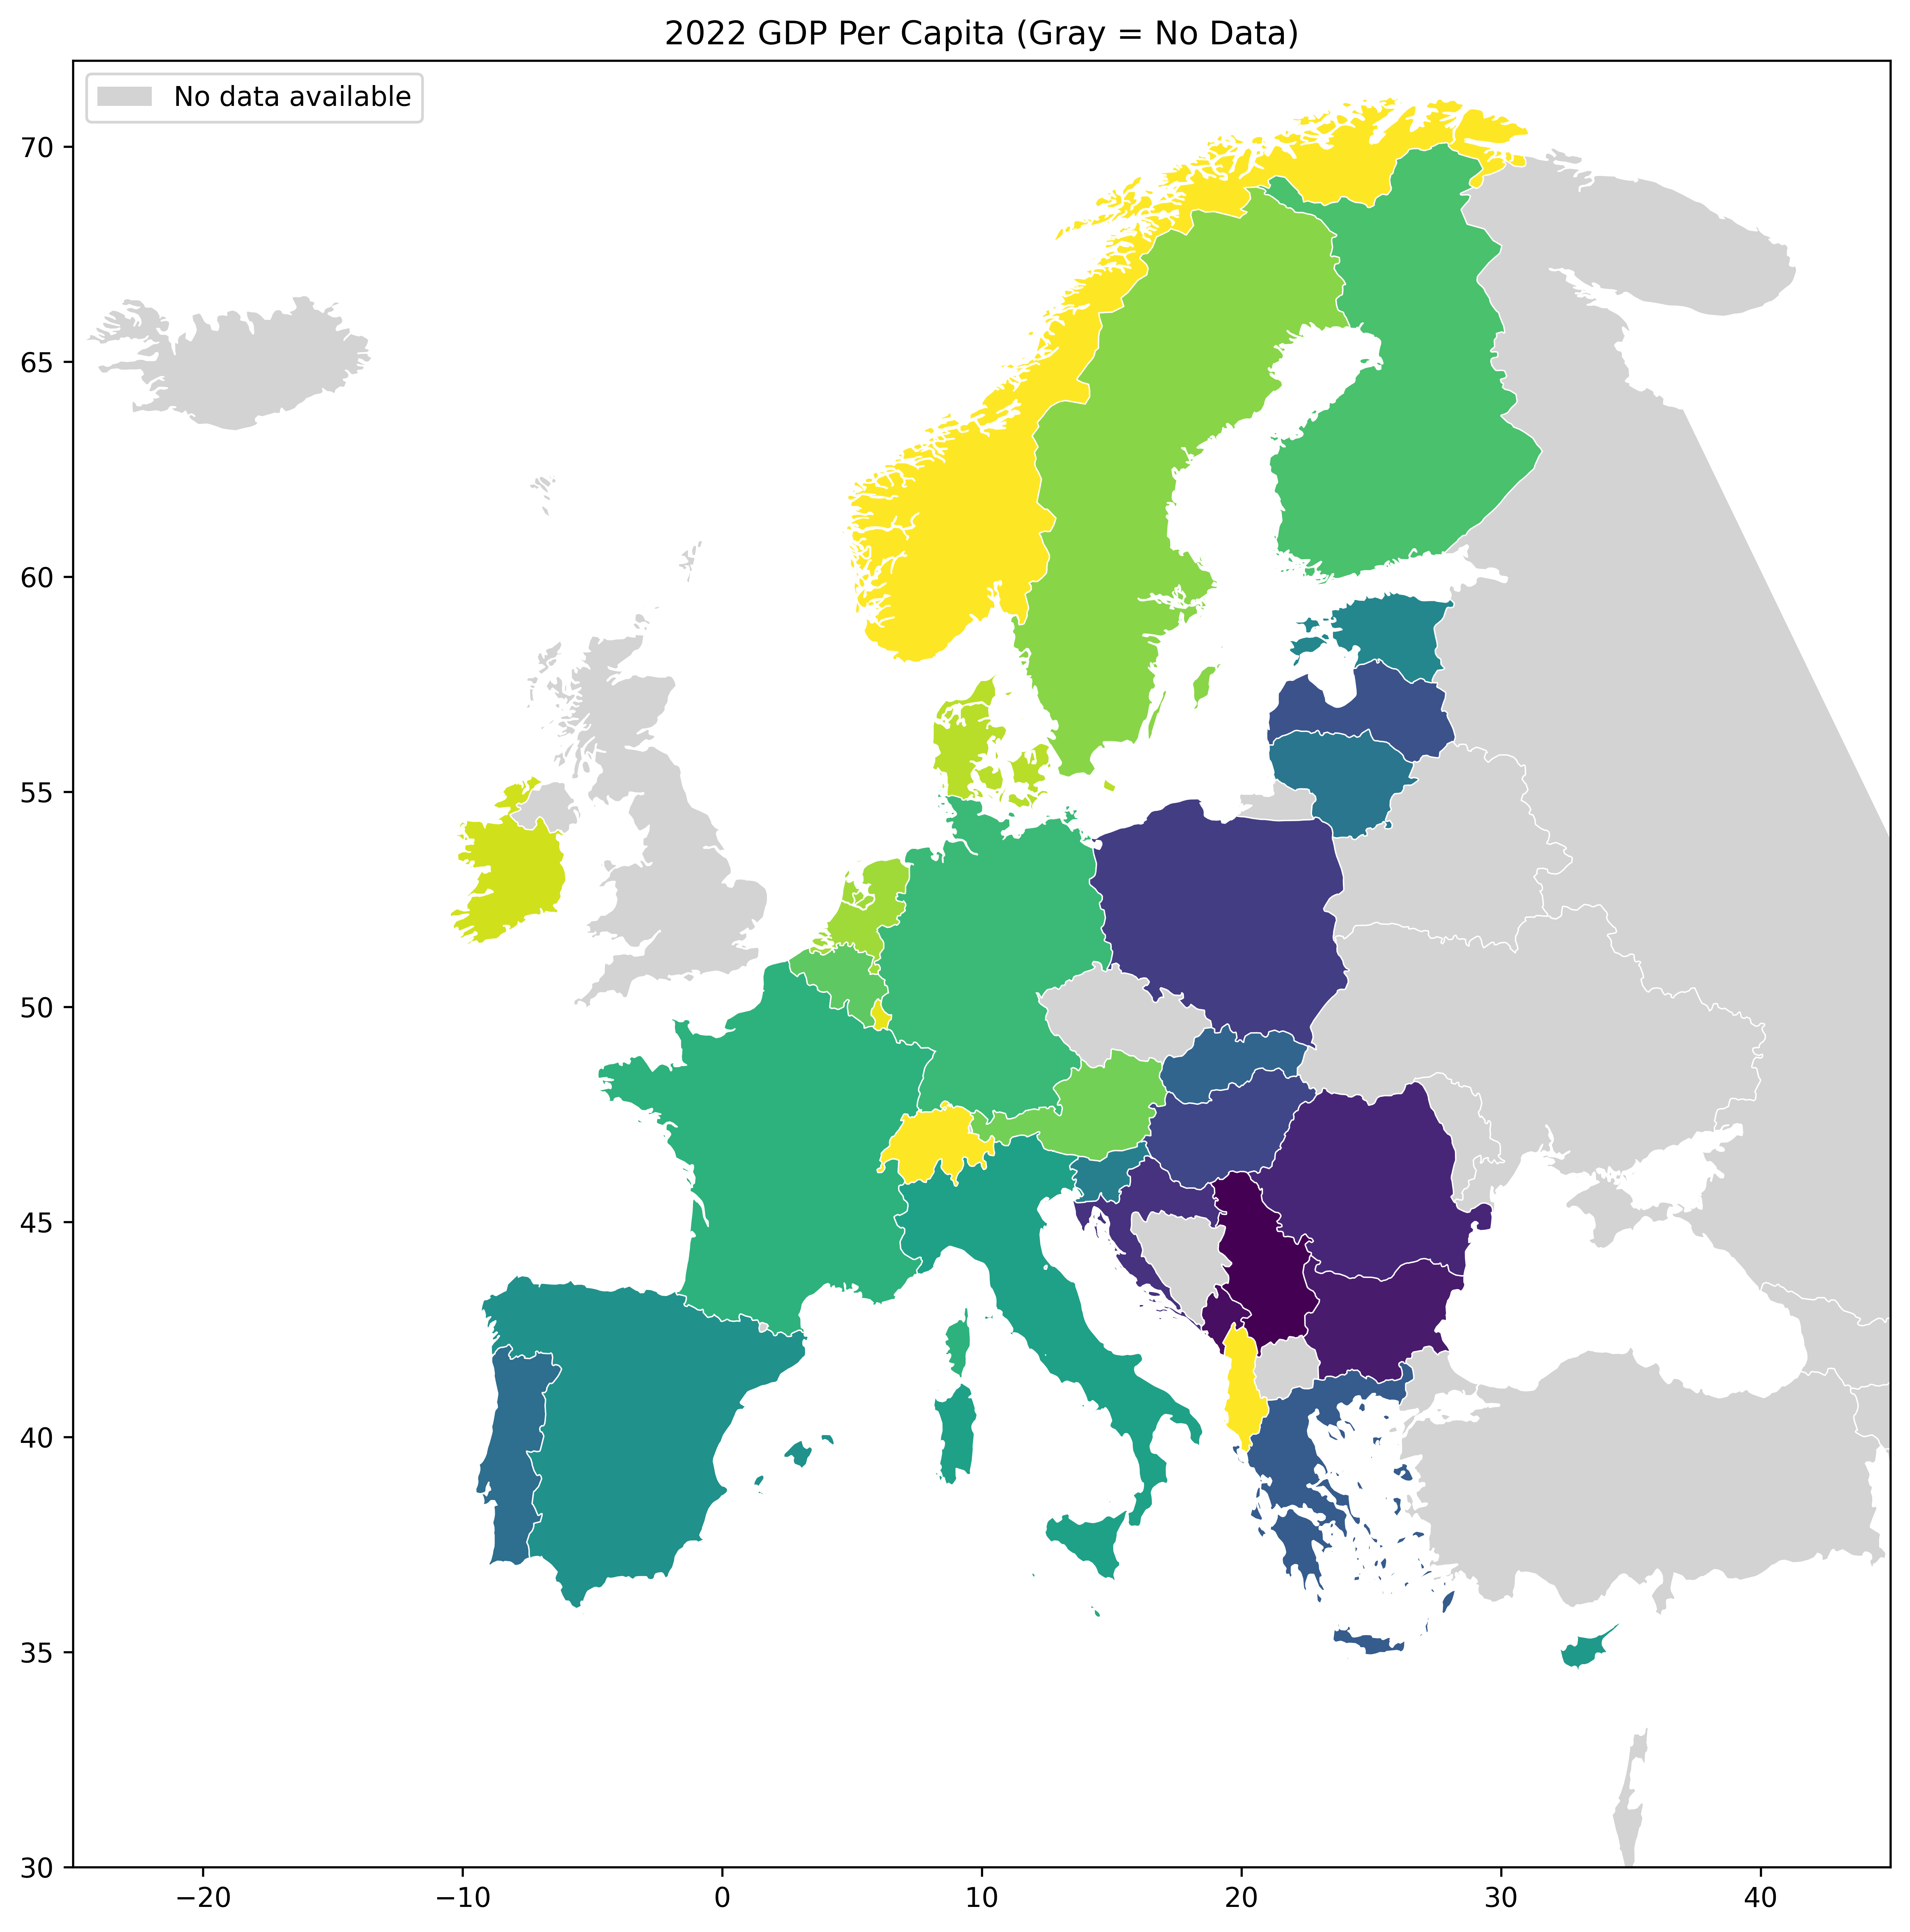

In [298]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=600)

year = '2022'

gdf = europe.join(gdp, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='viridis', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} GDP Per Capita (Gray = No Data)')
#ax.axis('off')

In [300]:
pm10_per_cap

2015      2016      2017      2018      2019      2020  \
Albania               NaN       NaN       NaN       NaN       NaN       NaN   
Austria          0.003587  0.003506  0.003503  0.003349  0.003322  0.003084   
Belgium          0.002993  0.003004  0.002845  0.002783  0.002519  0.002522   
Bulgaria         0.007463  0.006690  0.006750  0.006873  0.006925  0.007124   
Croatia          0.010128  0.010406  0.009404  0.010234  0.009716  0.011204   
Cyprus           0.001955  0.002129  0.002184  0.002232  0.002342  0.002122   
Czechia          0.009182  0.008829  0.008626  0.008090  0.007425  0.006932   
Denmark          0.004850  0.004770  0.004678  0.004491  0.004034  0.003851   
Estonia          0.010482  0.009200  0.009516  0.009185  0.007692  0.007856   
Finland          0.005686  0.005838  0.005563  0.005575  0.005372  0.004817   
France           0.004735  0.004806  0.004652  0.004428  0.004344  0.003799   
Germany          0.002616  0.002405  0.002426  0.002493  0.002321  0.002163   
Greece           0.006213  0.006229  0.006007  0.005443  0.005424  0.005271   
Hungary          0.007374  0.007138  0.006717  0.006224  0.005976  0.005537   
Iceland          0.007056  0.007855  0.007318  0.006715  0.006541  0.005795   
Ireland          0.005012  0.004998  0.004873  0.004769  0.004615  0.004458   
Italy            0.003830  0.003597  0.003768  0.003817  0.003446  0.003346   
Latvia           0.013297  0.012806  0.013508  0.013861  0.013799  0.013266   
Liechtenstein    0.001124  0.001063  0.001031  0.001049  0.000964  0.000877   
Lithuania        0.005361  0.006015  0.005077  0.007144  0.004949  0.004832   
Luxembourg       0.003748  0.003575  0.003352  0.003306  0.002867  0.002471   
Malta            0.002482  0.002938  0.002604  0.002837  0.002980  0.003205   
Montenegro            NaN       NaN       NaN       NaN       NaN       NaN   
Netherlands      0.001883  0.001843  0.001788  0.001742  0.001669  0.001547   
North Macedonia       NaN       NaN       NaN       NaN       NaN       NaN   
Norway           0.009059  0.008466  0.008413  0.008401  0.008048  0.007944   
Poland           0.010561  0.010879  0.010749  0.012706  0.011285   0.01064   
Portugal         0.005535  0.005603  0.005581  0.005618  0.005674  0.005502   
Romania          0.007303  0.007233  0.007256  0.007209  0.007543  0.007507   
Serbia                NaN       NaN       NaN       NaN       NaN       NaN   
Slovakia         0.005312  0.005012  0.005066  0.004257  0.004338  0.004315   
Slovenia         0.007045  0.007473  0.007168  0.006459  0.006384  0.006377   
Spain            0.005127  0.004628  0.004571  0.004917  0.004492  0.004409   
Sweden           0.004633  0.004664  0.004672  0.004518  0.004367  0.004184   
Switzerland      0.001929  0.001905  0.001862  0.001803  0.001764  0.001667   
Türkiye          0.004528  0.004374  0.004256  0.003163  0.003531  0.003788   

                     2021      2022  
Albania               NaN       NaN  
Austria          0.003287  0.003048  
Belgium          0.002702  0.002527  
Bulgaria         0.007124  0.006548  
Croatia          0.011185  0.009361  
Cyprus           0.002256  0.002149  
Czechia          0.007061  0.006606  
Denmark          0.003843  0.003648  
Estonia          0.007651  0.006769  
Finland          0.004941  0.004826  
France           0.004113  0.003717  
Germany          0.002195  0.002217  
Greece           0.005316  0.005644  
Hungary          0.005532  0.005353  
Iceland           0.00615  0.005762  
Ireland          0.004425   0.00408  
Italy            0.003582  0.003484  
Latvia           0.014614  0.014009  
Liechtenstein    0.000871   0.00089  
Lithuania        0.004948  0.005042  
Luxembourg       0.002554  0.002617  
Malta            0.002631  0.003524  
Montenegro            NaN       NaN  
Netherlands      0.001544  0.001528  
North Macedonia       NaN       NaN  
Norway           0.007988  0.008097  
Poland           0.010722  0.009589  
Portugal         0.005645  0.0055

In [311]:
gdp = pd.pivot(gdp_short, columns='Year')['GDP']

In [312]:
pm10_per_gdp_per_cap = pm10_per_cap / gdp

C:\Users\schat\anaconda3\lib\site-packages\geopandas\plotting.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


Text(0.5, 1.0, '2022 pm10 in Tons Per Capita Per GDP Per Capita (Gray = No Data)')

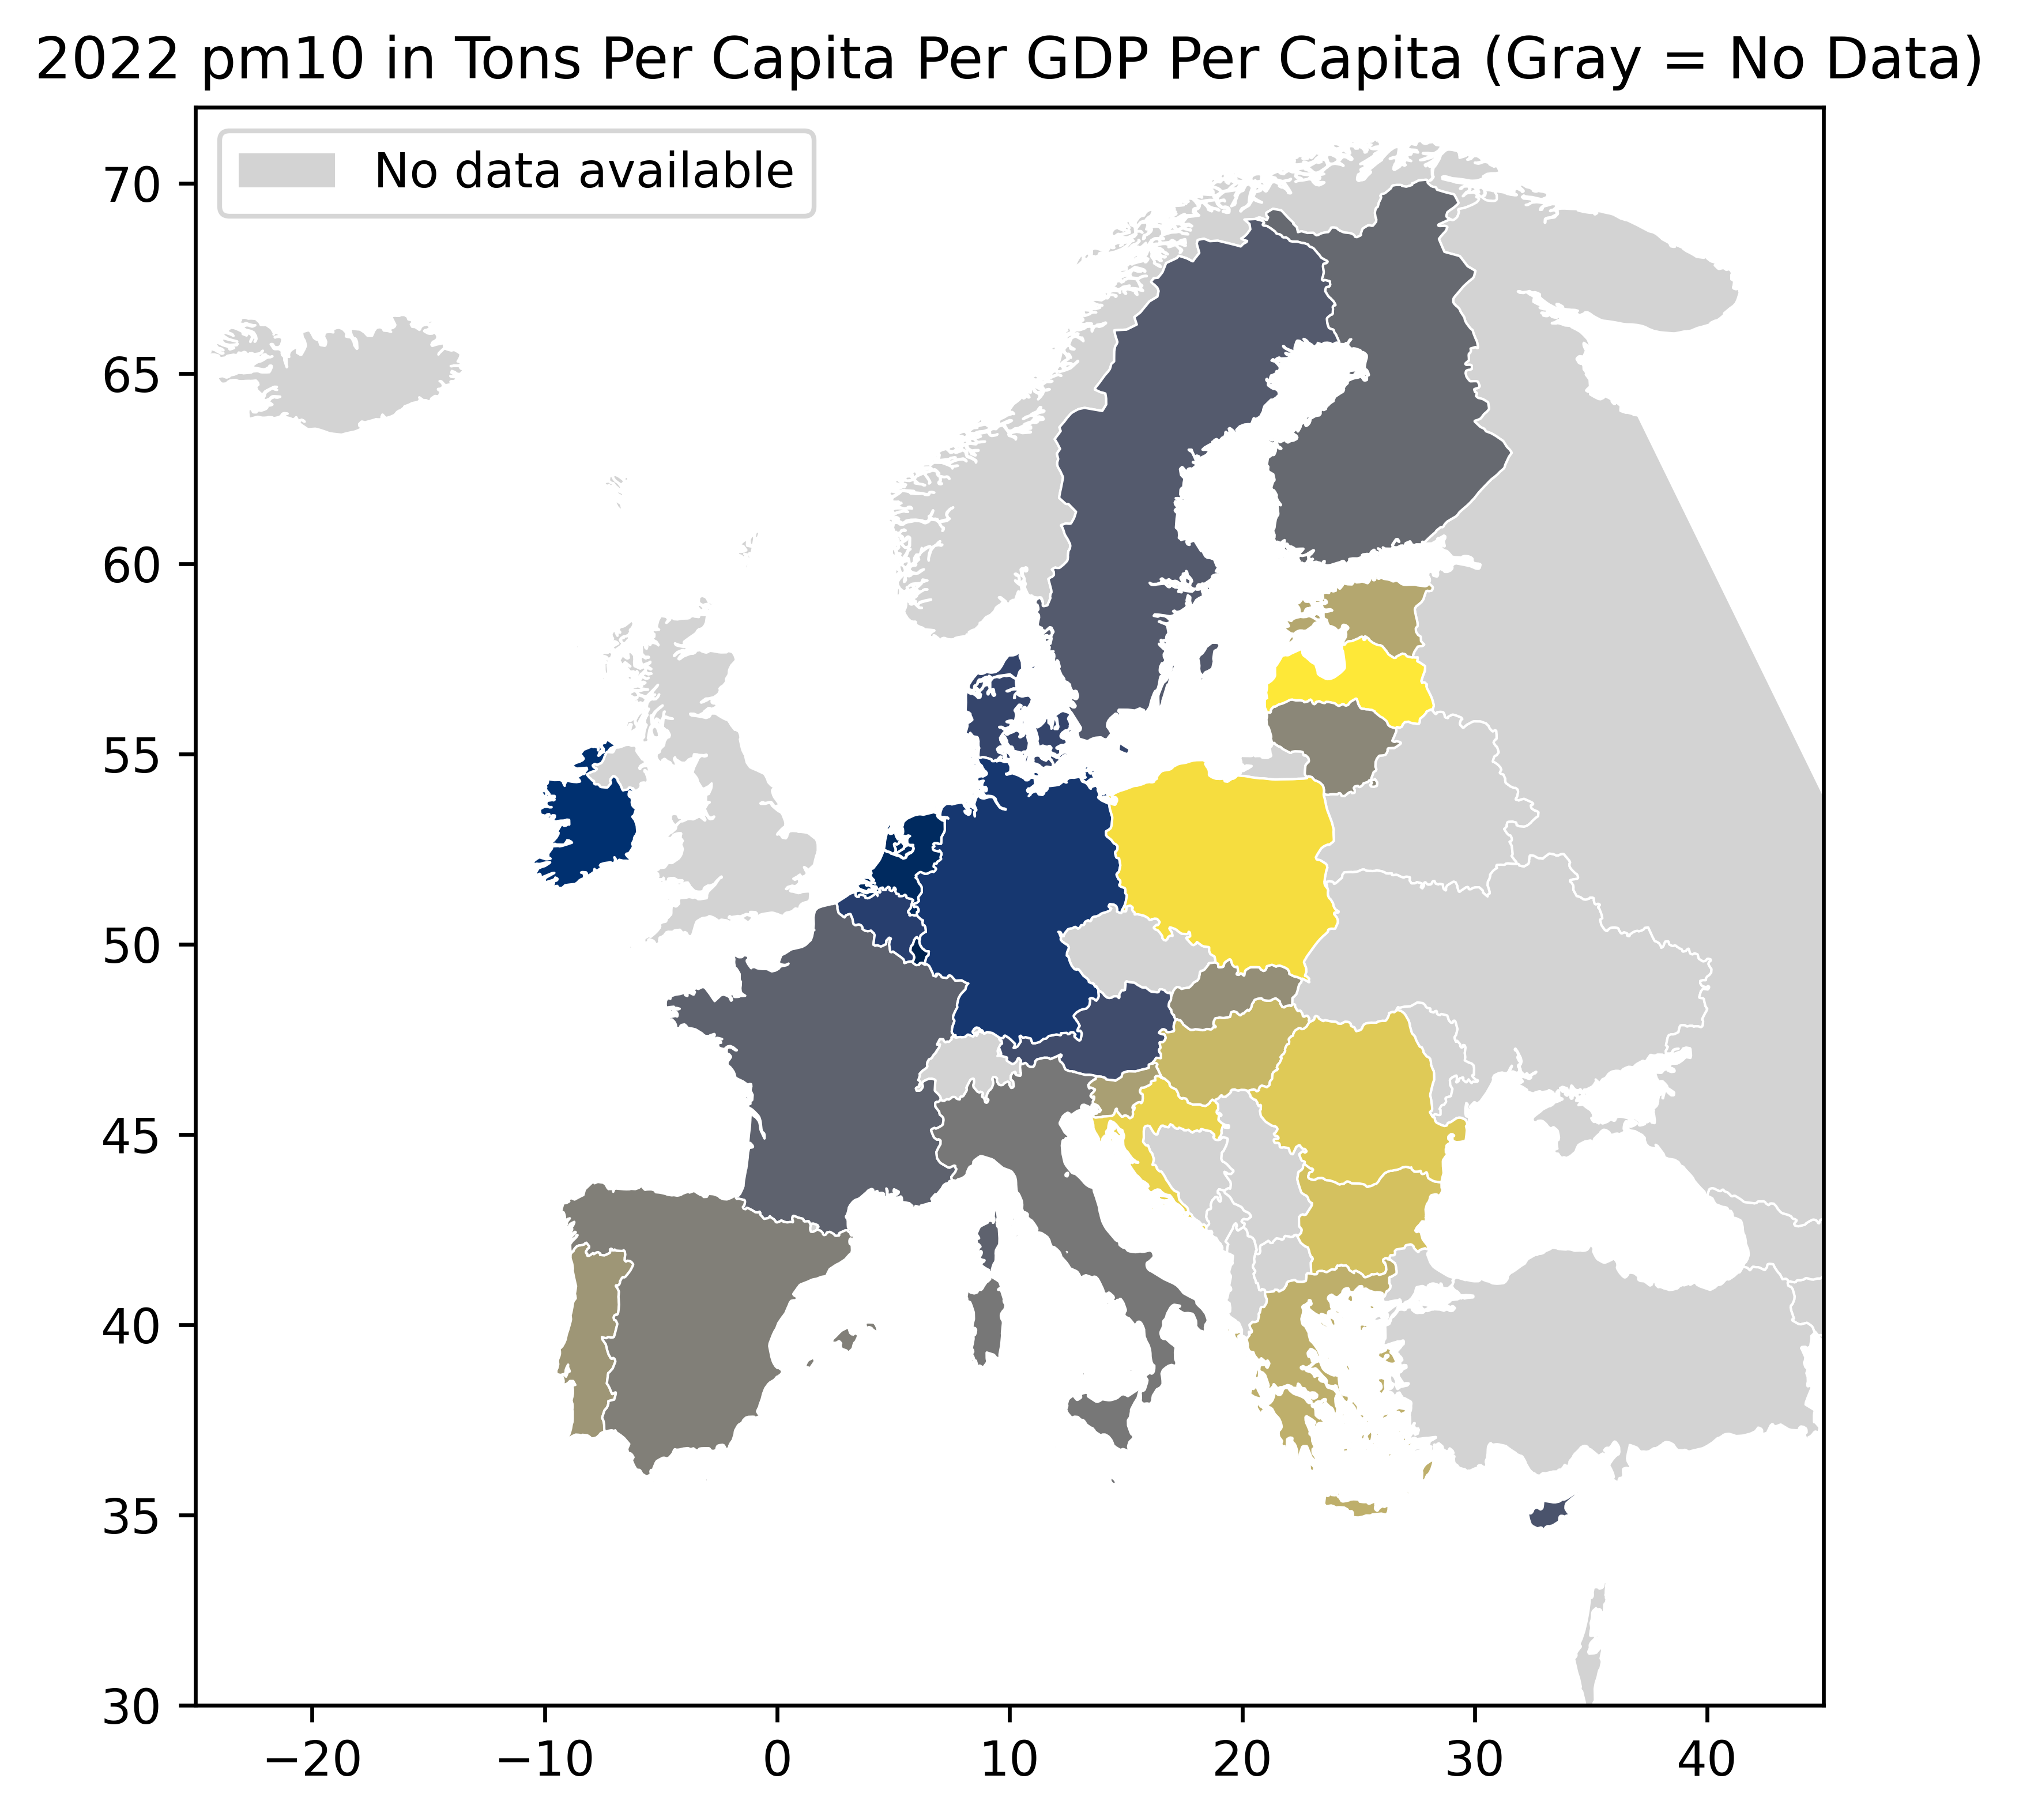

In [315]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=600)

year = '2022'

gdf = europe.join(pm10_per_gdp_per_cap, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='cividis', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} in Tons Per Capita Per GDP Per Capita (Gray = No Data)')
#ax.axis('off')